In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")

In [2]:
from matplotlib import font_manager, rc

#사용하려는 OTF 폰트의 경로 지정
font_path = r'C:\Users\User\AppData\Local\Microsoft\Windows\Fonts\NotoSansKR-Regular.otf'

#폰트 이름
font_name = font_manager.FontProperties(fname=font_path).get_name()

#폰트 설정
rc('font', family=font_name)

In [3]:
#엑셀 불러오기
file_path = 'C:\Python Project\Creative_Convergence_Competition_2023\Excel\_지난_1년_동안__가장_많이_이용한_여가공간__123순위_ 연령별__2016to2022.xlsx'
df = pd.read_excel(file_path)

#컬럼명 변경
df.columns = ['시점','항목','15~19세','20대','30대','40대','50대','60대','70세 이상']

#결측값 확인
print(df.info())  #전부 422개씩

#데이터프레임 출력
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422 entries, 0 to 421
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시점      422 non-null    object
 1   항목      422 non-null    object
 2   15~19세  422 non-null    object
 3   20대     422 non-null    object
 4   30대     422 non-null    object
 5   40대     422 non-null    object
 6   50대     422 non-null    object
 7   60대     422 non-null    object
 8   70세 이상  422 non-null    object
dtypes: object(9)
memory usage: 29.8+ KB
None
     시점              항목  15~19세   20대   30대   40대   50대   60대 70세 이상
0    시점              항목  15~19세   20대   30대   40대   50대   60대  70세이상
1  2016             표본수     827  1476  1707  1991  1956  1336   1309
2  2016              식당    20.5  36.4  36.4  37.4  36.8  29.1   22.7
3  2016  아파트 내 (집주변) 공터    16.1   8.7  19.3  19.6  22.6  31.4   39.3
4  2016            대형마트     5.5     6  24.2  27.8    22  19.7   12.1


In [4]:
#음식점 데이터프레임
dfEat = df.query("항목 == '식당' | 항목 == '카페' | 항목 == '커피숍'")
dfEat = dfEat.sort_values('시점', ascending=True, ignore_index = True)

#시점(연도)별로 그룹핑한 값 합계
dfEatYear = dfEat.groupby('시점', as_index=False).sum()
dfEatYear = dfEatYear.set_index("시점")

#연령층별 음식점 이용률
dfEatYear = dfEatYear.assign(
    total = lambda x: x['15~19세'] + x['20대'] + x['30대'] + x['40대'] + x['50대'] + x['60대'] + x['70세 이상'],    #전연령층 합
    청년층 = lambda x: ((x['15~19세'] + x['20대'] + x['30대']) / x['total'])*100, #청년층(15세~30대) 비율
    중장년층 = lambda x: ((x['40대'] + x['50대']) / x['total'])*100,    #중장년층(40대, 50대) 비율
    노년층 = lambda x: ((x['60대'] + x['70세 이상']) / x['total'])*100    #노년층(60대 이상) 비율
)

#인덱스가 0인 열을 제외한 모든 열의 값의 데이터타입을 숫자로 변환 → 반올림 정상적으로
for col in dfEatYear.columns[1:]:
    dfEatYear[col] = pd.to_numeric(dfEatYear[col], errors='coerce')

#소숫점 두 번째 자리 반올림
dfEatFinal = dfEatYear.iloc[:, [9, 10, 11]].round(2) #'청년층', '중장년층', '노년층

dfEatFinal

,청년층,중장년층,노년층
시점,,,
2016,53.29,29.74,16.97
2018,48.49,30.78,20.72
2019,50.69,28.93,20.38
2020,53.28,28.88,17.84
2021,53.40,28.58,18.02
2022,50.77,31.70,17.53


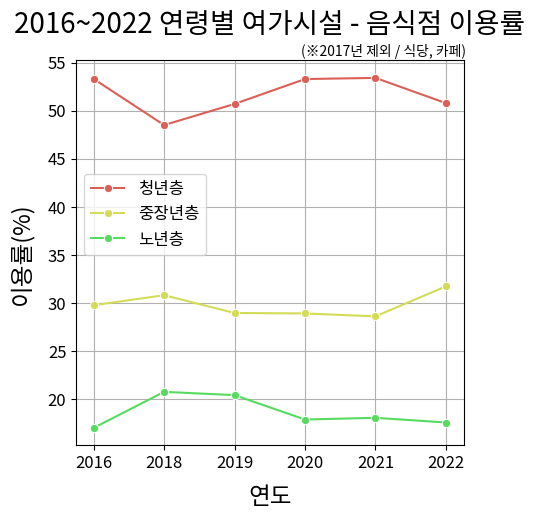

In [5]:
#그래프 크기
plt.figure(figsize=(5,5))

#seaborn 라이브러리에서 색상 선정
cm = sns.color_palette('hls')

#꺾은선 그래프
ax = sns.lineplot(dfEatFinal, marker='o', palette=cm, dashes=False)

ax.set_title("2016~2022 연령별 여가시설 - 음식점 이용률", pad=20, fontsize=20)  #타이틀
ax.text(5.28, 57, '(※2017년 제외 / 식당, 카페)', va='top', ha='right', fontsize=10) #텍스트 추가
ax.tick_params(labelsize=12)    #x,축 글자크기
ax.set_xlabel("연도", labelpad=10, fontsize=17) #x축 제목? 글자크기
ax.set_ylabel("이용률(%)", labelpad=10, fontsize=17)    #y축 제목? 글자크기

#범례
ax.legend(loc='center left', bbox_to_anchor=(0, 0.6), fontsize=12)

plt.grid()
plt.show()

In [6]:
#학습센터 데이터프레임
dfSchool = df.query("항목 == '학교운동장' | 항목 == '학교시설' | 항목 == '학원'")
dfSchool = dfSchool.sort_values('시점', ascending=True, ignore_index = True)

dfSchool

,시점,항목,15~19세,20대,30대,40대,50대,60대,70세 이상
0,2016,학교운동장,25.6,4.7,2.7,2.1,1.7,2.7,2.8
1,2016,학교시설,21.5,7.4,1,0.7,0.5,0.1,0.2
2,2016,학원,16.5,4.9,1.1,0.6,0.2,0.3,0.3
3,2018,학교운동장,23,5.7,3.2,2.4,2.5,3.6,3.2
4,2018,학교시설,19.5,7.3,0.3,0.2,0.3,0.1,0.3
5,2018,학원,17.9,9.1,2,0.8,0.6,0.3,0
6,2019,학교시설,18.6,7.4,0.4,0.4,0.4,0.4,0.4
7,2019,학원,6.1,4.1,0.6,0.3,1,0.2,0.1
8,2019,학교운동장,17.5,4.1,2.1,2.6,2.1,1.9,2.8
9,2020,학교운동장,21.3,3.2,2,2.3,2.4,2.9,2


In [7]:
#'-'값 0으로 대체
dfSchool = dfSchool.replace('-', 0)

#시점(연도)별로 그룹핑한 값 합계
dfSchoolYear = dfSchool.groupby("시점", as_index=False).sum()
dfSchoolYear = dfSchoolYear.set_index('시점')

#연령층별 학습센터 이용률
dfSchoolYear = dfSchoolYear.assign(
    total = lambda x: x['15~19세'] + x['20대'] + x['30대'] + x['40대'] + x['50대'] + x['60대'] + x['70세 이상'],    #전연령층 합
    청년층 = lambda x: ((x['15~19세'] + x['20대'] + x['30대']) / x['total'])*100,   #청년층(15세~30대) 비율
    중장년층 = lambda x: ((x['40대'] + x['50대']) / x['total'])*100,     #중장년층(40대, 50대) 비율
    노년층 = lambda x: ((x['60대'] + x['70세 이상']) / x['total'])*100  #노년층(60대 이상) 비율
)

#인덱스가 0인 열을 제외한 모든 열의 값의 데이터타입을 숫자로 변환 → 반올림 정상적으로
for col in dfSchoolYear.columns[1:]:
    dfSchoolYear[col] = pd.to_numeric(dfSchoolYear[col], errors='coerce')

#소숫점 두 번째 자리 반올림
dfSchoolFinal = dfSchoolYear.iloc[:,[9, 10, 11]].round(2)    #'청년층', '중장년층', '노년층

dfSchoolFinal

,청년층,중장년층,노년층
시점,,,
2016,87.50,5.94,6.56
2018,86.02,6.65,7.33
2019,82.86,9.25,7.89
2020,84.95,7.65,7.40
2021,86.52,7.84,5.64
2022,85.13,6.14,8.72


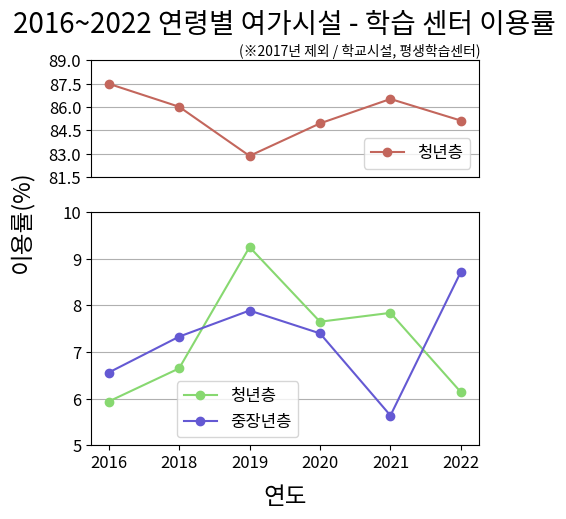

In [8]:
from matplotlib import gridspec

fig = plt.figure(figsize=(5,5)) #그래프 크기
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[1,2])   #2행 x 1열, 높이 비율 1대2
fig.subplots_adjust(hspace=0.2) #두 그래프 간격

bx1 = plt.subplot(gs[0])    #0번째 행
bx1.plot(dfSchoolFinal.iloc[:,0], marker='o', color='#C3665C')
bx1.set_title("2016~2022 연령별 여가시설 - 학습 센터 이용률", pad=20, fontsize=20)
bx1.text(5.28, 90.05, '(※2017년 제외 / 학교시설, 평생학습센터)', va='top', ha='right', fontsize=10) #텍스트 위치
bx1.tick_params(labelsize=12)
bx1.axes.xaxis.set_visible(False)   #x축 안 보이게
bx1.set_yticks(np.arange(81.5,90,1.5))  #y축 범위 1.5씩 증가
bx1.legend(dfSchoolFinal, loc='lower right', fontsize=12)
bx1.grid()  #그리드 표시

bx2 = plt.subplot(gs[1])    #첫번째 행
bx2.plot(dfSchoolFinal.iloc[:,1], marker='o', color='#87D870')
bx2.plot(dfSchoolFinal.iloc[:,2], marker='o', color='#6459D3')
bx2.tick_params(labelsize=12)
bx2.set_xlabel('연도', labelpad=10, fontsize=17)
bx2.set_yticks(np.arange(5,11)) #y축 범위
bx2.text(-1.4, 9.8, "이용률(%)", va='center', rotation='vertical', fontsize=17) #y축 제목 위치
bx2.legend(dfSchoolFinal, loc='lower left', bbox_to_anchor=(0.2, 0), fontsize=12)   #범례 위치
bx2.grid(axis='y')  #y축 그리드 표시

plt.show()

In [9]:
#기타 데이터프레임
dfEtc = df.query("항목 == '산' | 항목 == '종교시설' | 항목 == '기타 실내공간' | 항목 == '미용 관리실' | 항목 == '기타 실외공간'")
dfEtc = dfEtc.sort_values('시점', ascending=True, ignore_index=True)

dfEtcYear = dfEtc.groupby('시점', as_index=False).sum()
dfEtcYear = dfEtcYear.set_index('시점')

dfEtcYear = dfEtcYear.assign(
    total = lambda x: x['15~19세'] + x['20대'] + x['30대'] + x['40대'] + x['50대'] + x['60대'] + x['70세 이상'],
    청년층 = lambda x: ((x['15~19세'] + x['20대'] + x['30대']) / x['total'])*100,
    중장년층 = lambda x: ((x['40대'] + x['50대']) / x['total'])*100,
    노년층 = lambda x: ((x['60대'] + x['70세 이상']) / x['total'])*100
)

for col in dfEtcYear.columns[1:]:
    dfEtcYear[col] = pd.to_numeric(dfEtcYear[col], errors='coerce')

dfEtcFinal = dfEtcYear.iloc[:,[9,10,11]].round(2)
dfEtcFinal

,청년층,중장년층,노년층
시점,,,
2016,25.99,33.78,40.23
2018,25.47,35.47,39.06
2019,25.97,35.02,39.01
2020,26.72,31.10,42.18
2021,29.93,31.75,38.33
2022,28.65,31.93,39.42


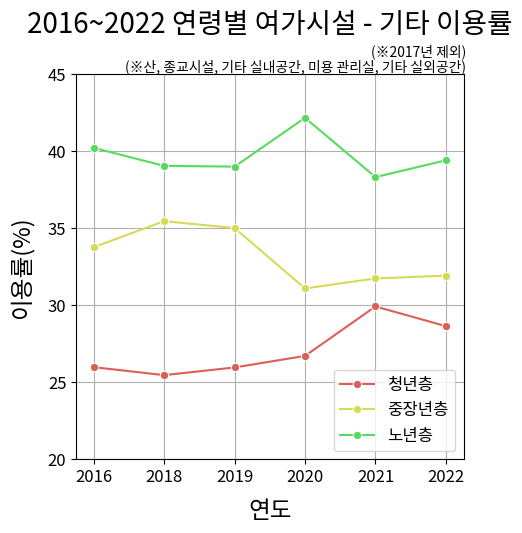

In [10]:
plt.figure(figsize=(5,5))

cm = sns.color_palette('hls')

ax = sns.lineplot(dfEtcFinal, marker='o', palette=cm, dashes=False)

ax.set_title("2016~2022 연령별 여가시설 - 기타 이용률", pad=30, fontsize=20)
ax.text(5.29, 47, '(※2017년 제외)', va='top', ha='right', fontsize=10)
ax.text(5.29, 46, '(※산, 종교시설, 기타 실내공간, 미용 관리실, 기타 실외공간)', va='top', ha='right', fontsize=10)
ax.tick_params(labelsize=12)
ax.set_xlabel("연도", labelpad=10, fontsize=17)
ax.set_ylabel("이용률(%)", labelpad=10, fontsize=17)
ax.set_yticks(np.arange(20,46,5))

ax.legend(loc='lower right',fontsize=12)

plt.grid()
plt.show()

In [11]:
#쇼핑
dfShop1 = df[df['항목'].str.contains('대형')]
dfShop2 = df.query("항목 == '재래시장' | 항목 == '쇼핑몰'")
dfShop = pd.concat([dfShop1, dfShop2])

dfShop = dfShop.sort_values('시점', ascending=True, ignore_index = True)

dfShop = dfShop.replace('-', 0)

dfShopYear = dfShop.groupby("시점", as_index=False).sum()
dfShopYear = dfShopYear.set_index('시점')

dfShopYear = dfShopYear.assign(
    total = lambda x: x['15~19세'] + x['20대'] + x['30대'] + x['40대'] + x['50대'] + x['60대'] + x['70세 이상'],
    청년층 = lambda x: ((x['15~19세'] + x['20대'] + x['30대']) / x['total'])*100,
    중장년층 = lambda x: ((x['40대'] + x['50대']) / x['total'])*100,
    노년층 = lambda x: ((x['60대'] + x['70세 이상']) / x['total'])*100
)

for col in dfShopYear.columns[1:]:
    dfShopYear[col] = pd.to_numeric(dfShopYear[col], errors='coerce')

dfShopFinal = dfShopYear.iloc[:,[9,10,11]].round(2)

dfShopFinal

,청년층,중장년층,노년층
시점,,,
2016,31.92,34.86,33.22
2018,30.01,35.06,34.93
2019,34.01,33.58,32.41
2020,29.66,36.40,33.94
2021,29.57,34.31,36.12
2022,29.08,34.63,36.29


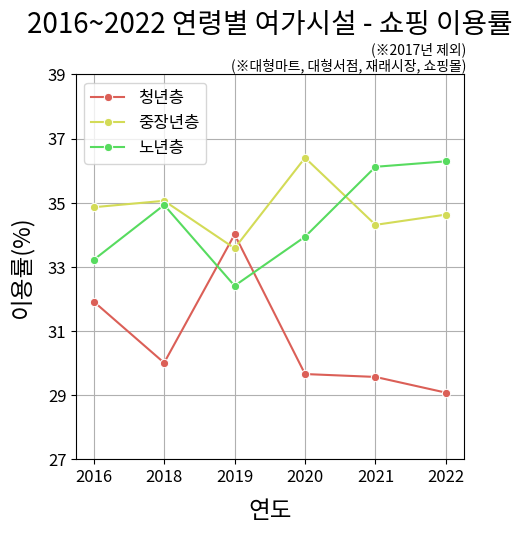

In [12]:
plt.figure(figsize=(5,5))

cm = sns.color_palette('hls')

ax = sns.lineplot(dfShopFinal, marker='o', palette=cm, dashes=False)

ax.set_title("2016~2022 연령별 여가시설 - 쇼핑 이용률", pad=30, fontsize=20)
ax.text(5.29, 40, '(※2017년 제외)', va='top', ha='right', fontsize=10)
ax.text(5.29, 39.5, '(※대형마트, 대형서점, 재래시장, 쇼핑몰)', va='top', ha='right', fontsize=10)
ax.tick_params(labelsize=12)
ax.set_xlabel("연도", labelpad=10, fontsize=17)
ax.set_ylabel("이용률(%)", labelpad=10, fontsize=17)
ax.set_yticks(np.arange(27, 41, 2))

ax.legend(fontsize=12)

plt.grid()
plt.show()

In [13]:
#종합
dfLeisure = df.query("항목 != '식당' & 항목 != '카페' & 항목 != '커피숍' & 항목 != '대형마트' & 항목 != '재래시장' & 항목 != '쇼핑몰' & 항목 != '대형서점' & 항목 != '학교운동장' & 항목 != '학교시설' & 항목 != '학원' & 항목 != '산' & 항목 != '종교시설' & 항목 != '기타 실내공간' & 항목 != '미용 관리실' & 항목 != '기타 실외공간'")
dfLeisure = dfLeisure.sort_values('시점', ascending=True, ignore_index = True)

dfLeisure = dfLeisure.replace('-', 0)

dfLeisureYear = dfLeisure.groupby('시점', as_index=False).sum()
dfLeisureYear = dfLeisureYear.set_index('시점')

dfLeisureYear = dfLeisureYear.iloc[[0,1,2,3,4,5], :]

dfLeisureYear = dfLeisureYear.assign(
    total = lambda x: x['15~19세'] + x['20대'] + x['30대'] + x['40대'] + x['50대'] + x['60대'] + x['70세 이상'],
    청년층 = lambda x: ((x['15~19세'] + x['20대'] + x['30대']) / x['total'])*100,
    중장년층 = lambda x: ((x['40대'] + x['50대']) / x['total'])*100,
    노년층 = lambda x: ((x['60대'] + x['70세 이상']) / x['total'])*100
)

dfLeisureFinal = dfLeisureYear.iloc[:,[9,10,11]].astype('float64').round(2)

dfLeisureFinal

,청년층,중장년층,노년층
시점,,,
2016,38.24,36.32,25.45
2018,36.17,37.09,26.74
2019,38.10,36.37,25.53
2020,38.15,36.26,25.59
2021,36.37,35.88,27.74
2022,33.59,34.53,31.88


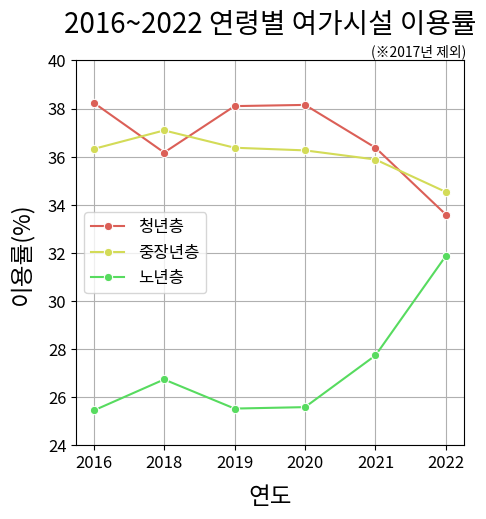

In [14]:
plt.figure(figsize=(5,5))

cm = sns.color_palette('hls')

ax = sns.lineplot(dfLeisureFinal, marker='o', palette=cm, dashes=False)

ax.set_title("2016~2022 연령별 여가시설 이용률", pad=20, fontsize=20)
ax.text(5.29, 40.7, '(※2017년 제외)', va='top', ha='right', fontsize=10)
ax.tick_params(labelsize=12)
ax.set_xlabel("연도", labelpad=10, fontsize=17)
ax.set_ylabel("이용률(%)", labelpad=10, fontsize=17)
ax.set_yticks(np.arange(24,42,2))

ax.legend(loc='center left', fontsize=12)

plt.grid()
plt.show()

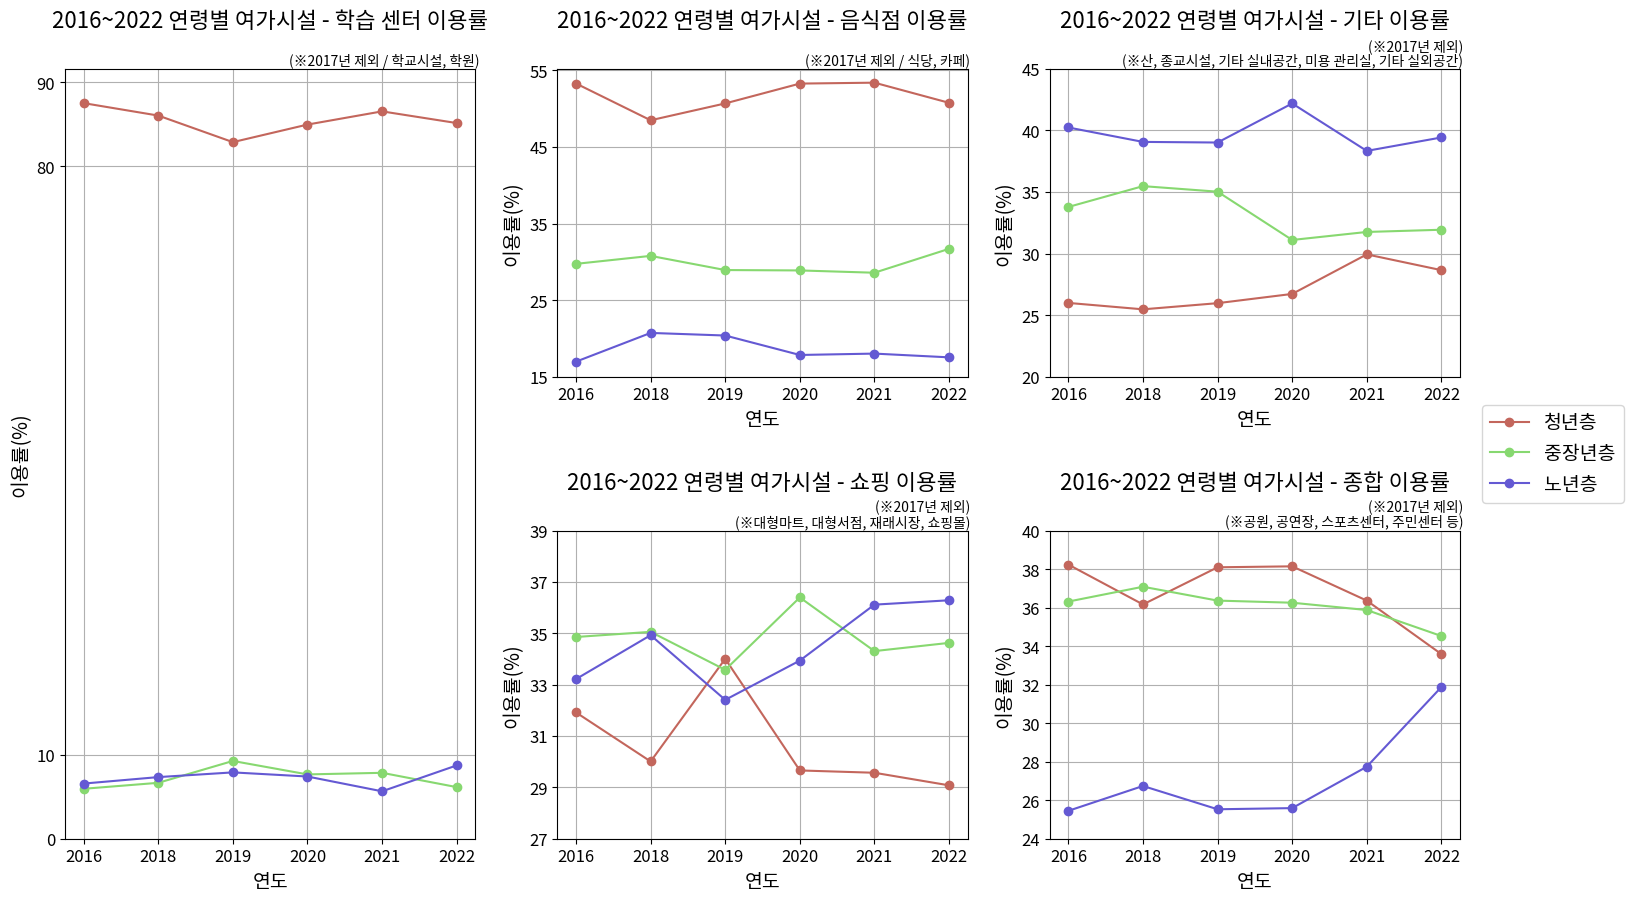

In [15]:
fig = plt.figure(figsize=(18,10))
gs = gridspec.GridSpec(nrows=2, ncols=3)
fig.subplots_adjust(hspace=0.5, wspace=0.2)

#학습센터
axSchool = plt.subplot(gs[:, 0])
axSchool.plot(dfSchoolFinal.iloc[:,0], marker='o', color='#C3665C')
axSchool.plot(dfSchoolFinal.iloc[:,1], marker='o', color='#87D870')
axSchool.plot(dfSchoolFinal.iloc[:,2], marker='o', color='#6459D3')
axSchool.set_title("2016~2022 연령별 여가시설 - 학습 센터 이용률", pad=30, fontsize=16)
axSchool.text(5.30, 93.5, '(※2017년 제외 / 학교시설, 학원)', va='top', ha='right', fontsize=10)
axSchool.tick_params(labelsize=12)
axSchool.set_xlabel("연도", fontsize=14)
axSchool.set_ylabel("이용률(%)", fontsize=14)
axSchool.set_yticks([0, 10, 80, 90])
#axSchool.legend(dfSchoolFinal, loc='center right', bbox_to_anchor=(1,0.5), fontsize=14)
axSchool.grid()

#음식점
axEat = plt.subplot(gs[0,1])
axEat.plot(dfEatFinal.iloc[:, 0], marker='o', color='#C3665C')
axEat.plot(dfEatFinal.iloc[:, 1], marker='o', color='#87D870')
axEat.plot(dfEatFinal.iloc[:, 2], marker='o', color='#6459D3')
axEat.set_title("2016~2022 연령별 여가시설 - 음식점 이용률", pad=30, fontsize=16)
axEat.text(5.28, 57.3, '(※2017년 제외 / 식당, 카페)', va='top', ha='right', fontsize=10)
axEat.tick_params(labelsize=12)
axEat.set_xlabel("연도", fontsize=14)
axEat.set_ylabel("이용률(%)", fontsize=14)
axEat.set_yticks(np.arange(15,65,10))
axEat.grid()

#기타
axEtc = plt.subplot(gs[0,2])
axEtc.plot(dfEtcFinal.iloc[:, 0], marker='o', color='#C3665C')
axEtc.plot(dfEtcFinal.iloc[:, 1], marker='o', color='#87D870')
axEtc.plot(dfEtcFinal.iloc[:, 2], marker='o', color='#6459D3')
axEtc.set_title("2016~2022 연령별 여가시설 - 기타 이용률", pad=30, fontsize=16)
axEtc.text(5.29, 47.5, '(※2017년 제외)', va='top', ha='right', fontsize=10)
axEtc.text(5.29, 46.3, '(※산, 종교시설, 기타 실내공간, 미용 관리실, 기타 실외공간)', va='top', ha='right', fontsize=10)
axEtc.tick_params(labelsize=12)
axEtc.set_xlabel("연도", fontsize=14)
axEtc.set_ylabel("이용률(%)", fontsize=14)
axEtc.set_yticks(np.arange(20,46,5))
axEtc.grid()

#쇼핑물
axShop = plt.subplot(gs[1,1])
axShop.plot(dfShopFinal.iloc[:, 0], marker='o', color='#C3665C')
axShop.plot(dfShopFinal.iloc[:, 1], marker='o', color='#87D870')
axShop.plot(dfShopFinal.iloc[:, 2], marker='o', color='#6459D3')
axShop.set_title("2016~2022 연령별 여가시설 - 쇼핑 이용률", pad=30, fontsize=16)
axShop.text(5.29, 40.25, '(※2017년 제외)', va='top', ha='right', fontsize=10)
axShop.text(5.29, 39.65, '(※대형마트, 대형서점, 재래시장, 쇼핑몰)', va='top', ha='right', fontsize=10)
axShop.tick_params(labelsize=12)
axShop.set_xlabel("연도", fontsize=14)
axShop.set_ylabel("이용률(%)", fontsize=14)
axShop.set_yticks(np.arange(27, 41, 2))
axShop.grid()

#종합
axLeisure = plt.subplot(gs[1,2])
axLeisure.plot(dfLeisureFinal.iloc[:, 0], marker='o', color='#C3665C')
axLeisure.plot(dfLeisureFinal.iloc[:, 1], marker='o', color='#87D870')
axLeisure.plot(dfLeisureFinal.iloc[:, 2], marker='o', color='#6459D3')
axLeisure.set_title("2016~2022 연령별 여가시설 - 종합 이용률", pad=30, fontsize=16)
axLeisure.text(5.29, 41.7, '(※2017년 제외)', va='top', ha='right', fontsize=10)
axLeisure.text(5.29, 40.9, '(※공원, 공연장, 스포츠센터, 주민센터 등)', va='top', ha='right', fontsize=10)
axLeisure.tick_params(labelsize=12)
axLeisure.set_xlabel("연도", fontsize=14)
axLeisure.set_ylabel("이용률(%)", fontsize=14)
axLeisure.set_yticks(np.arange(24,42,2))
#axSchool.legend(dfSchoolFinal, loc='center right', bbox_to_anchor=(1,0.5), fontsize=14)
axLeisure.legend(dfLeisureFinal, loc = 'center left', bbox_to_anchor=(1.03, 1.25), fontsize=14)
axLeisure.grid()

plt.show()

Creative_Convergence_Competition_2023/Python/leisure_space_age.ipynb

In [16]:
#전자상거래 가능한 여가시설
dfEcommerce = df.query("항목 == '영화관' | 항목 == '헬스클럽' | 항목 == '주제공원' | 항목 == '캠핑장' | 항목 == '유원지' | 항목 == '운동경기장' | 항목 == '골프장' | 항목 == '테마파크' | 항목 == '수영장' | 항목 == '국민체육센터' | 항목 == '공연장' | 항목 == '생활문화센터' | 항목 == '전시관' | 항목 == '리조트' | 항목 == '박물관' | 항목 == '사설문화센터' | 항목 == '미술관' | 항목 == '식물원' | 항목 == '문예회관' | 항목 == '기념관' | 항목 == '평생 학습관' | 항목 == '동물원' | 항목 == '수족관' | 항목 == '스키장' | 항목 == '지방문화원' | 항목 == '빙상경기장' | 항목 == '주민자치센터' | 항목 == '식당' | 항목 == '미용 관리실' | 항목 == '골프연습장' | 항목 == '낚시터'")
dfEcommerce = dfEcommerce.sort_values('시점', ascending=True, ignore_index = True)

dfEcommerce = dfEcommerce.replace('-', 0)

dfEcommerceYear = dfEcommerce.groupby('시점', as_index=False).sum()
dfEcommerceYear = dfEcommerceYear.set_index('시점')
dfEcommerceYear = dfEcommerceYear.iloc[[0,1,2,3,4,5], :]

dfEcommerceYear = dfEcommerceYear.assign(
    total = lambda x: x['15~19세'] + x['20대'] + x['30대'] + x['40대'] + x['50대'] + x['60대'] + x['70세 이상'],
    청년층 = lambda x: ((x['15~19세'] + x['20대'] + x['30대']) / x['total'])*100,
    중장년층 = lambda x: ((x['40대'] + x['50대']) / x['total'])*100,
    노년층 = lambda x: ((x['60대'] + x['70세 이상']) / x['total'])*100
)

dfEcommerceFinal = dfEcommerceYear.iloc[:,[9,10,11]].astype('float64').round(2)

dfEcommerceFinal

,청년층,중장년층,노년층
시점,,,
2016,46.40,32.66,20.94
2018,46.28,32.52,21.19
2019,47.38,30.87,21.75
2020,45.48,32.11,22.41
2021,47.89,30.57,21.53
2022,45.67,32.00,22.32


In [17]:
#평균
avg = dfEcommerceFinal.mean(axis=0).round(2).to_frame()
avg.columns = ['평균']
avg

,평균
청년층,46.52
중장년층,31.79
노년층,21.69


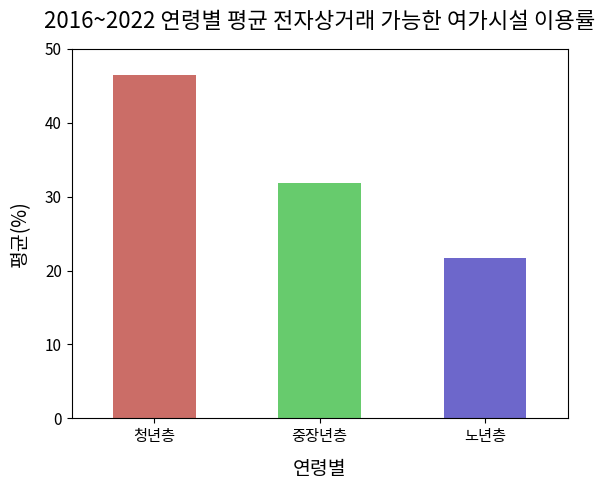

In [18]:
width=0.5

cm = sns.color_palette('hls', len(avg.index.unique()))  #len(avg.index.unique()) → 3

ax = sns.barplot(x=avg.index, y=avg['평균'], palette=cm)

for bar in ax.patches:    
    x = bar.get_x() # 막대 좌측 하단 x 좌표    
    old_width = bar.get_width() # 기존 막대 폭    
    bar.set_width(width) # 폭변경    
    bar.set_x(x+(old_width-width)/2) # 막대 좌측 하단 x 좌표 업데이트

ax.set_title("2016~2022 연령별 평균 전자상거래 가능한 여가시설 이용률", fontsize=16, pad=15)
ax.tick_params(labelsize=11)
ax.set_xlabel("연령별", fontsize=14, labelpad=10)
ax.set_ylabel("평균(%)", fontsize=14, labelpad=10)
ax.set_yticks(np.arange(0,55,10))

plt.show()